Mario Amador Hurtado 1637543

Albert Garcia Uría 1637521

# **Hash functions**

Imports

In [8]:
import hashlib
from typing import Optional, Tuple

## Exercici 1

In [9]:
def uab_md5(message: str, num_bits: int) -> Optional[int]:
    try:
        h = hashlib.md5(message.encode()).hexdigest()
        hash_int = int(h, 16)
        hash_bin = format(hash_int, "0128b")
        if num_bits > 128 or num_bits <= 0:
            raise ValueError()
        return int(hash_bin[:num_bits], 2)
    except:
        return None

print(uab_md5("hola", 1)) # prova

0


## Exercici 2

In [10]:
import random
import string

def second_preimage(message: str, num_bits: int):
    collision = False
    i = 0
    ref = uab_md5(message, num_bits)

    while not collision:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        pi_hash = uab_md5(pi, num_bits)

        if pi != message:
            collision = pi_hash == ref
            
        i += 1
    return pi, i-1
print(second_preimage("hola", 20)) # prova

('DH5Cqi7eud', 422440)


## Exercici 3

In [11]:
def collision(num_bits: int) -> Optional[Tuple[str, str, int]]:
    hashes = {}
    i=0
    while True:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        h = uab_md5(pi, num_bits)

        if h in hashes.keys():
            if pi not in hashes.values():
                return pi, hashes[h], i
        
        hashes[h] = pi
        i += 1
    return

print(collision(20)) # prova

('kjzTIUvcvK', 'WWK4Eive7W', 1444)


## Exercici 4

### Part A

In [12]:
import time
from tqdm import tqdm
preimage_iter = []
collision_iter = []

preimage_time = []
collision_time = []

for i in tqdm(range(1,25), desc='Progrés', unit=' iteració'):
    start = time.perf_counter()
    _, iter = second_preimage("hola", i)
    end = time.perf_counter()
    preimage_iter.append(iter)
    preimage_time.append(end-start)

    start = time.perf_counter()
    _, _, iter = collision(i)
    end = time.perf_counter()
    collision_iter.append(iter)
    collision_time.append(end-start)

print(preimage_iter)
print(preimage_time)

print(collision_iter)
print(collision_time)

Progrés: 100%|██████████| 24/24 [04:57<00:00, 12.38s/ iteració]

[0, 1, 21, 23, 39, 48, 52, 249, 1021, 724, 282, 2359, 5224, 19936, 33741, 54335, 40377, 19704, 659627, 2412419, 10878100, 2453660, 3465578, 32788919]
[3.8099999983387534e-05, 1.6500000015184924e-05, 0.0001430999999456617, 0.0001593000000639222, 0.0002302000000327098, 0.00034679999998843414, 0.0002710999999635533, 0.0018552000000227054, 0.006357699999966826, 0.004125100000010207, 0.0015253999999913503, 0.014260700000022553, 0.030224200000020573, 0.11230299999999716, 0.18535580000002483, 0.2996632999999065, 0.2239088000000038, 0.10665070000004562, 3.677596900000026, 13.539103899999986, 62.46750660000009, 13.803502600000002, 19.293421100000046, 183.15283169999987]
[2, 2, 2, 3, 13, 8, 15, 17, 24, 49, 117, 47, 48, 155, 439, 148, 96, 646, 788, 3588, 2540, 3692, 2035, 3201]
[2.519999998185085e-05, 1.9300000076327706e-05, 2.819999997427658e-05, 2.5499999992462108e-05, 8.35999999253545e-05, 4.910000006930204e-05, 8.89000000370288e-05, 0.0001796000000240383, 0.00018360000001393928, 0.00027570000

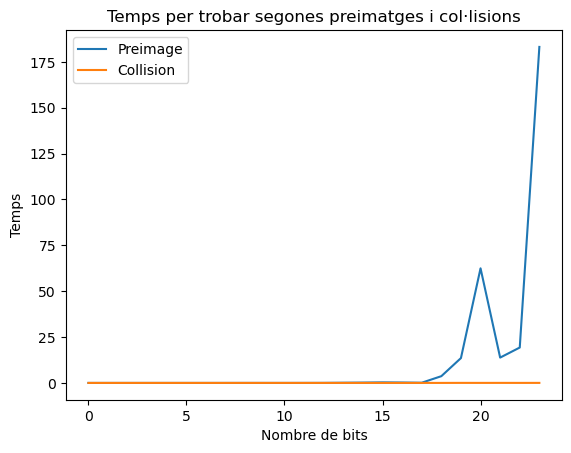

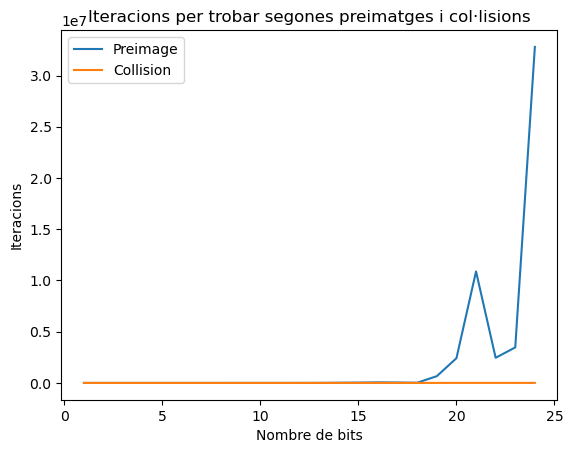

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(1, 25), preimage_time, label = "Preimage")
plt.plot(range(1, 25), collision_time, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Temps')
plt.title('Temps per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

plt.plot(range(1, 25), preimage_iter, label = "Preimage")
plt.plot(range(1, 25), collision_iter, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

In [27]:
from tabulate import tabulate

taula = list(zip(range(1,25),preimage_time, collision_time))
print("ITERACIONS")
print(tabulate(taula, headers=['Iteracions','Segona preimatge', 'Col·lisions'], tablefmt='grid'))

ITERACIONS
+--------------+--------------------+---------------+
|   Iteracions |   Segona preimatge |   Col·lisions |
+==============+====================+===============+
|            1 |          3.81e-05  |     2.52e-05  |
+--------------+--------------------+---------------+
|            2 |          1.65e-05  |     1.93e-05  |
+--------------+--------------------+---------------+
|            3 |          0.0001431 |     2.82e-05  |
+--------------+--------------------+---------------+
|            4 |          0.0001593 |     2.55e-05  |
+--------------+--------------------+---------------+
|            5 |          0.0002302 |     8.36e-05  |
+--------------+--------------------+---------------+
|            6 |          0.0003468 |     4.91e-05  |
+--------------+--------------------+---------------+
|            7 |          0.0002711 |     8.89e-05  |
+--------------+--------------------+---------------+
|            8 |          0.0018552 |     0.0001796 |
+--------------+-

In [29]:
print("TEMPS")
taula = list(zip(range(1,25), preimage_iter, collision_iter))
print(tabulate(taula, headers=['Segons','Segona preimatge', 'Col·lisions'], tablefmt='grid'))

TEMPS
+----------+--------------------+---------------+
|   Segons |   Segona preimatge |   Col·lisions |
+==========+====================+===============+
|        1 |                  0 |             2 |
+----------+--------------------+---------------+
|        2 |                  1 |             2 |
+----------+--------------------+---------------+
|        3 |                 21 |             2 |
+----------+--------------------+---------------+
|        4 |                 23 |             3 |
+----------+--------------------+---------------+
|        5 |                 39 |            13 |
+----------+--------------------+---------------+
|        6 |                 48 |             8 |
+----------+--------------------+---------------+
|        7 |                 52 |            15 |
+----------+--------------------+---------------+
|        8 |                249 |            17 |
+----------+--------------------+---------------+
|        9 |               1021 |           

### Part B

In [16]:
import math

def n_teoric_preimage(num_bits : int) -> float:
    return 2** (num_bits - 1) / 2

def n_teoric_collision(num_bits : int) -> float:
    return math.sqrt(math.log(2)) * 2**((num_bits+1)/2)

preimage_teoric_iter = []
collision_teoric_iter = []

for i in range (1,25):
    preimage_teoric_iter.append(n_teoric_preimage(i))
    collision_teoric_iter.append(n_teoric_collision(i))
    

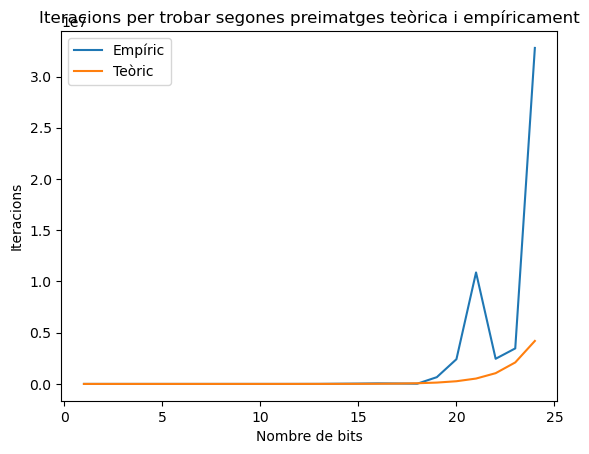

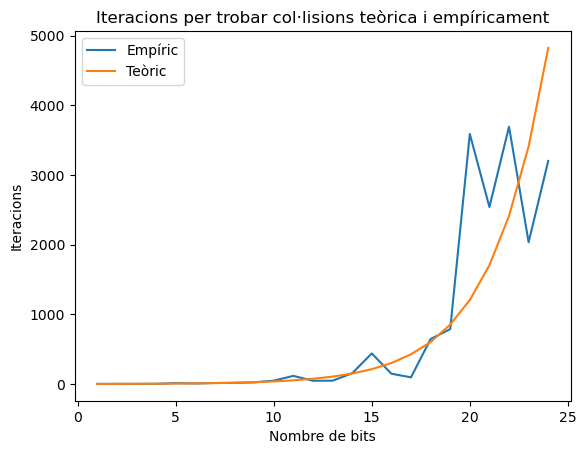

In [31]:
plt.plot(range(1, 25), preimage_iter, label = "Empíric")
plt.plot(range(1, 25), preimage_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar segones preimatges teòrica i empíricament')
plt.legend()
plt.show()

plt.plot(range(1, 25), collision_iter, label = "Empíric")
plt.plot(range(1, 25), collision_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar col·lisions teòrica i empíricament')
plt.legend()
plt.show()

## Proves

In [18]:
import unittest
class TestLab1(unittest.TestCase):
    
    def test_uab_md5(self):
        test_vectors_ok = (
        ["hola", 100, 381757249806289069081790873225],
        ["hola", 1, 0],
        ["dfk3874", 68, 229291433845740375560],
        ["dfk3874", 64, 14330714615358773472],
        ["Alexandria", 128, 221630910082124901698625759824682079437],
        ["Alexandria", 129, None],
        ["Alexandria", 0, None])
        for t in test_vectors_ok:
            my_value = uab_md5(t[0], t[1])
            print(my_value, t[2])
            self.assertEqual(my_value, t[2])

    def test_second_preimage(self):
        msg = "find a second preimage"
        for n in range(1, 15):
            new_msg, _ = second_preimage(msg, n)
            self.assertEqual(uab_md5(new_msg, n), uab_md5(msg, n))
            self.assertNotEqual(new_msg, msg)

    def test_collision(self):
        for n in range(1, 15):
            msg1, msg2, _ = collision(n)
            self.assertEqual(uab_md5(msg1, n), uab_md5(msg2, n))
            self.assertNotEqual(msg1, msg2)
unittest.main(argv=[''], verbosity=2, exit=False, buffer=True)

test_collision (__main__.TestLab1) ... ok
test_second_preimage (__main__.TestLab1) ... ok
test_uab_md5 (__main__.TestLab1) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.079s

OK


In [20]:
print("Anàlisi de dificultat d’aconseguir segones preimatges i col·lisions".upper())

ANÀLISI DE DIFICULTAT D’ACONSEGUIR SEGONES PREIMATGES I COL·LISIONS
